In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score 
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [85]:
data = pd.read_excel("Imon.xlsx")

In [86]:
data

,Пол,Возраст,Семейное положение,Национальность,Повторный клиент,Сумма выдачи номинал,Дата выдачи,Дата окончание срока,Валюта,Срок,Тип залога,Образование,Тип бизнеса,Цель кредита,Просрочки за цикл (кумулятивный),Длительность самой долгой единовременной просрочки в течение цикла,Просрочки на дату 07.06.2021,Льготный период,Дата списания,Сумма списания
0,Жен,18.05.1994,Single,Таджик,Старый клиент,2000,13.11.2018,13.11.2019,TJS,12,Ювелирные изделия,Среднее образование,3. Хизматрасони/Услуги,Потребительские цели,0,0,0,0,00.00.0000,NaN
1,Муж,30.01.1977,Divorced,Таджик,Старый клиент,20000,19.11.2018,19.11.2020,TJS,24,Смешанное обеспечение,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,36,16,0,0,00.00.0000,NaN
2,Муж,12.10.1965,Married,Таджик,Старый клиент,3000,29.11.2018,29.11.2019,TJS,12,Поручительство,Высшее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,1,1,0,0,00.00.0000,NaN
3,Жен,01.03.1970,Married,Таджик,Старый клиент,2000,11.12.2018,11.12.2019,TJS,12,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,0,0,0,0,00.00.0000,NaN
4,Муж,07.02.1992,Married,Таджик,Новый клиент,5000,08.02.2019,10.02.2020,TJS,12,Поручительство,Среднее образование,3. Хизматрасони/Услуги,Потребительские цели,6,3,0,0,00.00.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,Муж,17.05.1993,Married,Таджик,Старый клиент,9000,20.08.2019,20.08.2021,TJS,24,Поручительство,Высшее образование,3. Хизматрасони/Услуги,Потребительские цели,0,0,0,0,00.00.0000,NaN
2995,Муж,09.10.1973,Married,Таджик,Старый клиент,15000,20.08.2019,20.08.2020,TJS,12,Поручительство,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,10,6,0,0,00.00.0000,NaN
2996,Жен,17.11.1971,Married,Таджик,Старый клиент,5000,26.08.2019,26.08.2020,TJS,12,Не обеспеченный,Среднее образование,1. Карзи истеъмоли/Потребительский кредит,Потребительские цели,5,5,0,0,00.00.0000,NaN
2997,Жен,04.10.1979,Married,Таджик,Старый клиент,15000,22.08.2019,23.08.2021,TJS,24,Поручительство,Среднее образование,4. Савдо / Торговля,Потребительские цели,4,2,0,0,00.00.0000,NaN


In [87]:
data.columns

Index(['Пол', 'Возраст', 'Семейное положение', 'Национальность',
       'Повторный клиент', 'Сумма выдачи номинал', 'Дата выдачи',
       'Дата окончание срока', 'Валюта', 'Срок', 'Тип залога', 'Образование',
       'Тип бизнеса', 'Цель кредита', 'Просрочки за цикл (кумулятивный)',
       'Длительность самой долгой единовременной просрочки в течение цикла',
       'Просрочки на дату 07.06.2021', 'Льготный период', 'Дата списания',
       'Сумма списания'],
      dtype='object')

In [88]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(data)

# Примените LabelEncoder к каждому столбцу с типом "объект", кроме "Семейное положение"
encoder = LabelEncoder()
df['Пол'] = encoder.fit_transform(df['Пол'])
df['Повторный клиент'] = encoder.fit_transform(df['Повторный клиент'])
df['Валюта'] = encoder.fit_transform(df['Валюта'])
df['Тип залога'] = encoder.fit_transform(df['Тип залога'])
df['Образование'] = encoder.fit_transform(df['Образование'])
df['Тип бизнеса'] = encoder.fit_transform(df['Тип бизнеса'])
df['Цель кредита'] = encoder.fit_transform(df['Цель кредита'])

# Преобразуйте столбец "Семейное положение" с использованием pd.factorize
df['Семейное положение'] = pd.factorize(df['Семейное положение'])[0]

In [89]:
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла']>15, 'Выдача']=0
data.loc[data['Длительность самой долгой единовременной просрочки в течение цикла']<=15, 'Выдача']=1


In [90]:
from datetime import datetime

df = pd.DataFrame(data)

# Преобразуем столбец 'Date_of_Birth' в формат datetime
df['Возраст'] = pd.to_datetime(df['Возраст'])

# Получаем текущую дату
current_date = datetime.now()

# Вычисляем возраст и добавляем его в новый столбец 'Age'
df['Возраст_код'] = (current_date - df['Возраст']).astype('<m8[Y]')

C:\Users\extre\AppData\Local\Temp\ipykernel_22856\2314203767.py:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Возраст'] = pd.to_datetime(df['Возраст'])


In [91]:
data=data.drop(['Национальность','Валюта','Возраст','Тип залога','Цель кредита','Просрочки за цикл (кумулятивный)','Длительность самой долгой единовременной просрочки в течение цикла','Сумма списания','Льготный период','Просрочки на дату 07.06.2021'], axis=1)

In [92]:
data=data.drop('Дата выдачи', axis=1)

In [93]:
data

,Пол,Семейное положение,Повторный клиент,Сумма выдачи номинал,Дата окончание срока,Срок,Образование,Тип бизнеса,Дата списания,Выдача,Возраст_код
0,0,0,1,2000,13.11.2019,12,5,2,00.00.0000,1.0,29.0
1,1,1,1,20000,19.11.2020,24,1,0,00.00.0000,0.0,46.0
2,1,2,1,3000,29.11.2019,12,1,0,00.00.0000,1.0,57.0
3,0,2,1,2000,11.12.2019,12,5,0,00.00.0000,1.0,53.0
4,1,2,0,5000,10.02.2020,12,5,2,00.00.0000,1.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
2994,1,2,1,9000,20.08.2021,24,1,2,00.00.0000,1.0,30.0
2995,1,2,1,15000,20.08.2020,12,5,0,00.00.0000,1.0,50.0
2996,0,2,1,5000,26.08.2020,12,5,0,00.00.0000,1.0,51.0
2997,0,2,1,15000,23.08.2021,24,5,3,00.00.0000,1.0,44.0


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Пол                   2999 non-null   int32  
 1   Семейное положение    2999 non-null   int64  
 2   Повторный клиент      2999 non-null   int32  
 3   Сумма выдачи номинал  2999 non-null   int64  
 4   Дата окончание срока  2999 non-null   object 
 5   Срок                  2999 non-null   int64  
 6   Образование           2999 non-null   int32  
 7   Тип бизнеса           2999 non-null   int32  
 8   Дата списания         2999 non-null   object 
 9   Выдача                2999 non-null   float64
 10  Возраст_код           2999 non-null   float64
dtypes: float64(2), int32(4), int64(3), object(2)
memory usage: 211.0+ KB


In [96]:
data=data.drop(['Дата списания','Дата окончание срока'], axis=1)

In [102]:
data = data.rename(columns={'Сумма выдачи номинал': 'Issue_amount_nominal'})
data = data.rename(columns={'Возраст_код': 'age'})
data = data.rename(columns={'Повторный клиент': 'Type_of_client'})
data = data.rename(columns={'Тип бизнеса': 'Type_of_business'})
data = data.rename(columns={'Пол': 'gender'})
data = data.rename(columns={'Выдача': 'issuance'})
data = data.rename(columns={'Срок': 'Term'})
data = data.rename(columns={'Образование': 'education'})
data = data.rename(columns={'Семейное положение': 'Family_status'})

In [103]:
data.corr()

,gender,Family_status,Type_of_client,Issue_amount_nominal,Term,education,Type_of_business,issuance,age
gender,1.000000,-0.002699,-0.078414,0.077788,-0.060758,-0.177200,0.061018,-0.068760,-0.204100
Family_status,-0.002699,1.000000,0.127551,0.057414,0.031162,0.057970,0.043789,0.108004,0.373330
Type_of_client,-0.078414,0.127551,1.000000,0.065637,0.110411,0.008049,-0.021565,0.297379,0.205831
Issue_amount_nominal,0.077788,0.057414,0.065637,1.000000,0.392448,-0.134308,0.143825,-0.019370,0.017669
Term,-0.060758,0.031162,0.110411,0.392448,1.000000,-0.057829,-0.025725,-0.122992,0.084412
education,-0.177200,0.057970,0.008049,-0.134308,-0.057829,1.000000,0.206588,0.015366,0.083479
Type_of_business,0.061018,0.043789,-0.021565,0.143825,-0.025725,0.206588,1.000000,-0.045551,-0.085713
issuance,-0.068760,0.108004,0.297379,-0.019370,-0.122992,0.015366,-0.045551,1.000000,0.139038
age,-0.204100,0.373330,0.205831,0.017669,0.084412,0.083479,-0.085713,0.139038,1.000000


In [100]:
X=data.drop(['Выдача'],axis=1)
y=data['Выдача']

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=14)

# SVM(Gausian)

In [16]:
from sklearn.svm import SVC
svclassifier0 = SVC(kernel='rbf')
svclassifier0.fit(X_train, y_train)

SVC()

In [17]:
y_pred0 = svclassifier0.predict(X_test)

In [18]:
cnf_matrix0 = confusion_matrix(y_test, y_pred0) 
print(cnf_matrix)

NameError: name 'cnf_matrix' is not defined

In [19]:
SVM_Accur0 = metrics.accuracy_score(y_test,y_pred0)
print(SVM_Accur0)

0.81


In [20]:
metrics.roc_auc_score(y_test, y_pred0)

0.502906976744186

# SVM(Polynomial)

In [21]:
from sklearn.svm import SVC
svclassifier1 = SVC(kernel='poly', degree=8)
svclassifier1.fit(X_train, y_train)

SVC(degree=8, kernel='poly')

In [22]:
y_pred1 = svclassifier1.predict(X_test)

In [24]:
cnf_matrix1 = confusion_matrix(y_test, y_pred1) 
print(cnf_matrix1)

[[  5 167]
 [  0 728]]


In [26]:
SVM_Accur1 = metrics.accuracy_score(y_test,y_pred1)
print(SVM_Accur1)

0.8144444444444444


In [27]:
metrics.roc_auc_score(y_test, y_pred1)

0.5145348837209303

# SVM(Sigmoid)

In [28]:
svclassifier2 = SVC(kernel='sigmoid')
svclassifier2.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [29]:
y_pred2 = svclassifier2.predict(X_test)

In [30]:
cnf_matrix2 = confusion_matrix(y_test, y_pred2) 
print(cnf_matrix2)

[[ 20 152]
 [104 624]]


In [31]:
SVM_Accur2 = metrics.accuracy_score(y_test,y_pred2)
print(SVM_Accur2)

0.7155555555555555


In [32]:
metrics.roc_auc_score(y_test, y_pred2)

0.48671096345514947

#Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [46]:
X=data.drop(['Выдача','Сумма списания'],axis=1)
y=data['Выдача']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=14)

In [48]:
from sklearn.linear_model import LinearRegression, LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9790376369699857
0.9722222222222222


C:\Users\extre\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
rf = RandomForestClassifier(n_estimators=100 , min_samples_split = 10 , random_state=42 , min_samples_leaf = 4 , max_depth = 20)

In [50]:
rf.fit(X_train , y_train)


RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

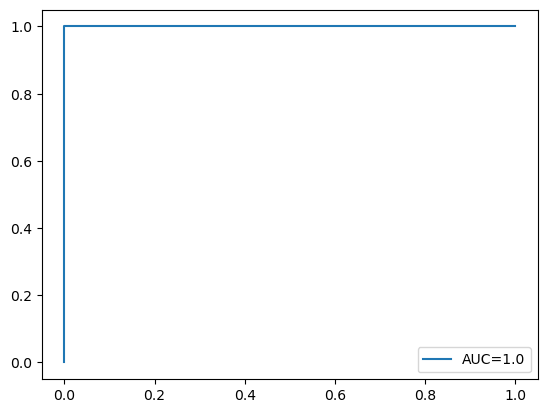

In [52]:
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.legend(loc=4)
plt.show()

# Dec. Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

In [54]:
y_predict = model_tree.predict(X_test)

In [57]:
print (accuracy_score(y_test,y_predict))

1.0


# Rand. Forest

In [58]:
forest1 =  RandomForestClassifier(criterion='gini', n_estimators =250 , random_state = 200, n_jobs = 2)
forest1.fit(X_train, y_train)
y_predict = forest1.predict(X_test)  
forest1auc = metrics.roc_auc_score(y_test,y_predict)
print(forest1auc)

1.0


In [101]:
models = {
    "ModelTree.pkl": model_tree,
    "Forest.pkl": rf,
    "Forest(par).pkl": forest1,
    "LogReg.pkl": logreg,
}

for filename, model in models.items():
    with open(filename, "wb") as pickle_out:
        pickle.dump(model, pickle_out)